# Regresión lineal simple

El ejercicio consiste en predecir el consumo de agua per capita en galones por día en la Ciudad de New York en base al número de habitantes.

El conjunto de datos es extraído desde https://data.cityofnewyork.us/.

## 1. Dataset y visualización de datos

Campos del dataset:
- year: año.
- new_york_city_population: población de la ciudad de Nueva York.
- nyc_consumption_million_gallons_per_day : consumo en Nueva York (millones de galones por día)
- per_capita_gallons_per_person_per_day: per cápita (galones por persona por día)

In [69]:
import pandas as pd

# Número filas a visualizar en los df
pd.options.display.max_rows = 4

In [70]:
URL = 'https://data.cityofnewyork.us/resource/ia2d-e54m.csv' 
df = pd.read_csv(URL)
df

,year,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
...,...,...,...,...
42,2021,8467513.0,979.0,116
43,2022,8335897.0,999.0,120


## 2. Visualización de datos 

In [71]:
import matplotlib.pyplot as plt

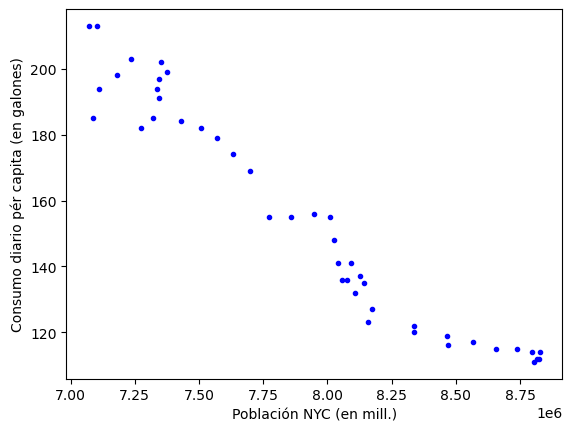

In [72]:
plt.plot(df['new_york_city_population'], df['per_capita_gallons_per_person_per_day'], 'b.')
plt.xlabel("Población NYC (en mill.)")
plt.ylabel("Consumo diario pér capita (en galones)")
plt.show()

## 3. Desarrollo del modelo 

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
# El método LinearRegression es asignado a una variable.
modelo = LinearRegression()

In [75]:
# Se entrena el algoritmo. 
# Pasando el total de datos de la población de NYC en el eje X y el consulo de galones diario per capita en el eje Y
modelo.fit(df['new_york_city_population'].values.reshape(-1, 1), df['per_capita_gallons_per_person_per_day'].values)

LinearRegression()

In [76]:
# Obtenemos theta0 (ordenada) y theta1 (variable X) óptimas
print(modelo.intercept_) # Theta0
print(modelo.coef_) # Theta1

613.1859896931653
[-5.79352956e-05]


In [77]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
import numpy as np

x_min_max = np.array([[df["new_york_city_population"].min()], [df["new_york_city_population"].max()]])
y_pred = modelo.predict(x_min_max)

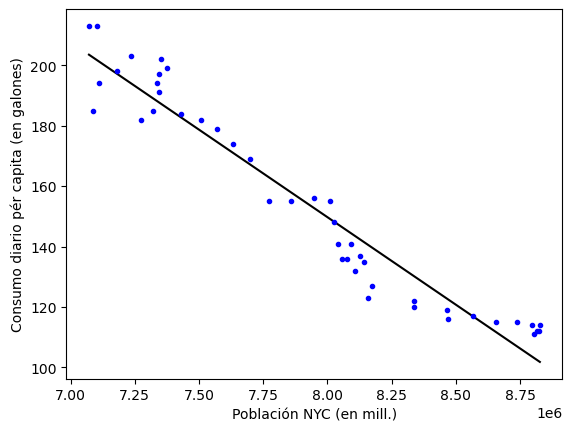

In [78]:
# Representación gráfica de la función hipótesis generada

plt.plot(x_min_max, y_pred, color='black') # Función hipótesis
plt.plot(df['new_york_city_population'], df['per_capita_gallons_per_person_per_day'], "b.") # Nube de datos
plt.xlabel("Población NYC (en mill.)")
plt.ylabel("Consumo diario pér capita (en galones)")
plt.show()

### 5. Predicción ejemplificada

Suponiendo una población de 7.5 M de personas.
Además, del gráfico del caso y la función hipótesis.

In [79]:
x_new = np.array([[7500000]]) 

# Predicción del consumo diario per capita según x_new. Usamos el método .predic()
consumo_per_capita = modelo.predict(x_new) 
consumo_per_capita

array([178.6712727])

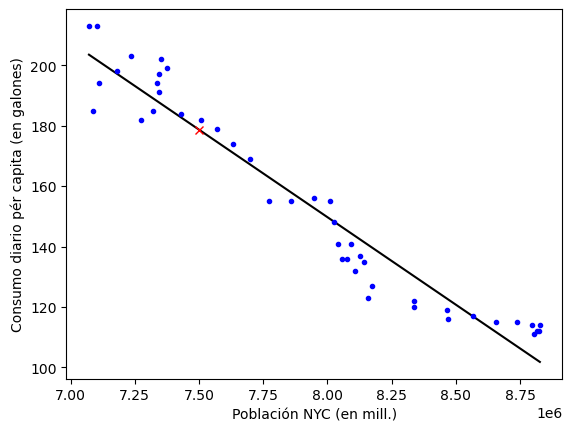

In [80]:
plt.plot(x_min_max, y_pred, color = 'black') # Función hipótesis
plt.plot(df['new_york_city_population'], df['per_capita_gallons_per_person_per_day'], "b.") # Nube de datos
plt.plot(x_new, consumo_per_capita, "rx") # Predicción ejemplificada
plt.xlabel("Población NYC (en mill.)")
plt.ylabel("Consumo diario pér capita (en galones)")
plt.show()